#  Simulation Runner for SparkShark AMMPS Simulation - v0.0.1 - Run#6
With MMLucaFactor Fixes

## Aim  
We will test that the ammps market can produce results that are in agreement with the Lucas asset pricing model. When the market makers have market maker Lucas factor = 1 they will only consider the dividend for pricing, while if it's 0 they will only consider their inventory. moving the factor away from 1 should create deviations from the Lucas pricing model. Even when the factor is 0 we will expect some degree of alignment between the prices and the Lucas pricing model as the institutional investors are using the Lucas pricing model too.  
  
While the institutional investors are Lucas asset pricers, they have some dispersion of their fair price. This is set by the inst_val_std parameter. We want to see how that dispersion affect the prices and trading.  
  
## Setup  


## Static parameters

### SHARKFin
 --quarters 4
 --expectations InferentialExpectations
 --expectations ClientRPCMarket

(use the default CRRA, DiscFac, dividend growth rate and dividend std, p1, p2, AttentionSimulation, LUCAS0 population)


### AMMPS
 -days parameter to 240 to simulate a "sharkfin year".
 Grid - Variation:


Less MM Lucas factor, more II variation, more attention, higher zeta, higher dphm all contribute to the collapse of the financial system.
Other notes

We will continue to use the stripped down version of AMMPs with only MM, II, the Broker, and noise traders. This should have 30 minute runtime, but won't reproduce stylized facts of the stock market.

### AMMPS:  
As usual get the latest binaries from the master branch of ammps_sharkfin_container  
  
AMMPS comes with a number of new runtime options for outputs.  
  
The most important is the -c option, if it is set to true the logger write a compressed csv file. This saves a large amount of space and avoids us having to compress later. This comes with a small overhead on the cpu but if we are aiming for 1.1 core per simulation we should be covered.  
  
A second new option that might be useful is the -p option that adds a prefix to the logs written by ammps.  
  
For running a Lucas shark simulation with ammps only, we need to set an option to simulate a connection with SHARKfin this is done by setting the -s option to true. This option also comes with the -v and -d options that control the daily volume passed to the broker institutions simulating volume from the consumers in SHARKFin. In this case we just set both to 0.0. When using this option there should be no option to specify a RPC host etc.  
  
For running a Lucas Shark 0 simulation with ammps only we need to run:  
  
`dotnet [path_to]amm.engine.dll RunConfFromFile config_file output_directory -n unique_id_number [-c true] -s true -v 0.0 -d 0.0 [-p prefix]`  
  
I suggest using the compression option. Prefix option can be left out if you don't think it is usefull.  
  
### AMMPS Configuration Generator  
The ammps configuration generator generates a configuration file for the specific ammps simulation, this contains simulation specific parameters such as the period to be simulated, the random seed to be used, and the configurations for the agents in the simulations. It is now packed as a python package that can be installed in a python environment, or the scripts can be run using python.  
  
Scripts for generating the configs is found in the acg/simulations subdir.  
  
For the Lucas shark tests we need to run  
  
`make_lucas_shark_config.py [-h] [--out-dir CONF_DIR] --name RUN_NAME --seed SEED [--days NUMBER_OF_DAYS] --mm_lucas_factor MM_LUCAS_FACTOR [--mm_size MM_SIZE] [--inst_val_std DIVIDEND_VAL_STD]`  
  
The new options are --mm_lucas_factor MM_LUCAS_FACTOR [--mm_size MM_SIZE] [--inst_val_std DIVIDEND_VAL_STD]  
  
### Simulation Grid  
We want to test a simulation grid where we change mm_lucas_factor and inst_val_std, attention, dphm, zeta, pop_aNrmInitMean and seed.  
  

### AMMPS parameters:

  mm_lucas_factor =[0.0, 0.05, 0.15, 1.0]
  inst_val_std = [0.1,0.15, 0.2]
  mm_size [105, 10000]
### SHARKFin parameters:

 attention = [0.005, 0.015, 0.05]
 dphm = [1000, 5000, 10000]
 zeta = [0, 0.3, .7, 1.0]
 pop_aNrmInitMean =  [5, 6, 7]




## Configure Parameters

In [4]:
from simRunner import *
from simConfigs import *
#experiment parameters
experimentName='sparksharkrun6'
tag ='rpc'
quarters=4
#Replicant Parameters:
seedcount=1
seedKey=6174
mmLucasFactors =[0.0, 0.05, 0.15, 1.0] 
mm_sizes = [105, 10000]
instValStds = [0.1, 0.15, 0.2]
attention_values = [0.005, 0.015, 0.05]
dphms = [1000, 5000, 10000]
zetas = [0, 0.3, .7, 1.0]
pop_aNrmInitMeans =  [5, 6, 7]

#mmLucasFactors =[0.0]#, 0.05, 0.15, 1.0] 
#instValStds = [0.1, 0.15]#, 0.2]
#attention_values = [0.005]#, 0.015, 0.05]
#dphms = [1000, 5000]#, 10000]
#zetas = [0, 0.3]#, .7, 1.0]
#pop_aNrmInitMeans =  [5]#, 6, 7]

rpc_host = '20.230.0.191'
quarters=4
cyclecloud='13.92.241.145'
finsim = '20.102.81.218'
user = 'ammpssharkfin'
simengine = 'simEngine.pem'

In [23]:
print(experimentName)
#!az login
#!Connect-AzAccount 
#!az login --use-device-code`

sparksharkrun6
A web browser has been opened at https://login.microsoftonline.com/organizations/oauth2/v2.0/authorize. Please continue the login in the web browser. If no web browser is available or if the web browser fails to open, use device code flow with `az login --use-device-code`.
The following tenants require Multi-Factor Authentication (MFA). Use 'az login --tenant TENANT_ID' to explicitly login to a tenant.
72f988bf-86f1-41af-91ab-2d7cd011db47 'Microsoft'
[
  {
    "cloudName": "AzureCloud",
    "homeTenantId": "7cf48d45-3ddb-4389-a9c1-c115526eb52e",
    "id": "0abf6ad3-c04d-4533-8d9b-9d9c3e79d822",
    "isDefault": false,
    "managedByTenants": [],
    "name": "UP-OIT-Nittany-AI-Advance",
    "state": "Enabled",
    "tenantId": "7cf48d45-3ddb-4389-a9c1-c115526eb52e",
    "user": {
      "name": "wjt5121@psu.edu",
      "type": "user"
    }
  },
  {
    "cloudName": "AzureCloud",
    "homeTenantId": "7cf48d45-3ddb-4389-a9c1-c115526eb52e",
    "id": "39bf3a99-0a18-494c-ac4b-d

## Build Simulation Objects

In [6]:
#create entities in python list

simEntities = build_mmsparkShark_configs(experimentName,seedcount,seedKey,rpc_host,mmLucasFactors,mm_sizes,instValStds,attention_values,dphms,zetas,pop_aNrmInitMeans,quarters,tag)
simcount = len(simEntities)
print(simcount)


Generating simulations using the following seeds:[4343]
2592


## Load Simulation Objects in Azure Tables

In [7]:
#!az login
vaultName = 'sharkfinkv'
#names of needed secerts and keys - These can be located/updated here  ----> sharkfinkv.vault.azure.net
connectionName = 'simulationdataConnectionString'
#create table
newTable = create_table(experimentName,vaultName,connectionName)
#create a simulation grid clss object to store the simulation configurations
simTable = simulationGrid(experimentName, vaultName, connectionName)


opened vault, retrived secrect string
Creating Table Client
Creating Table
opened vault, retrived secrect string


In [8]:
#create entities in Azure Table (csv list)
for sim in simEntities:
    create_table_entity(simTable,sim)

{'date': datetime.datetime(2023, 7, 3, 15, 25, 36, tzinfo=datetime.timezone.utc), 'etag': 'W/"datetime\'2023-07-03T15%3A25%3A36.7608911Z\'"', 'version': '2019-02-02'}
{'date': datetime.datetime(2023, 7, 3, 15, 25, 36, tzinfo=datetime.timezone.utc), 'etag': 'W/"datetime\'2023-07-03T15%3A25%3A36.8098619Z\'"', 'version': '2019-02-02'}
{'date': datetime.datetime(2023, 7, 3, 15, 25, 36, tzinfo=datetime.timezone.utc), 'etag': 'W/"datetime\'2023-07-03T15%3A25%3A36.8528382Z\'"', 'version': '2019-02-02'}
{'date': datetime.datetime(2023, 7, 3, 15, 25, 36, tzinfo=datetime.timezone.utc), 'etag': 'W/"datetime\'2023-07-03T15%3A25%3A36.8958139Z\'"', 'version': '2019-02-02'}
{'date': datetime.datetime(2023, 7, 3, 15, 25, 36, tzinfo=datetime.timezone.utc), 'etag': 'W/"datetime\'2023-07-03T15%3A25%3A36.9467845Z\'"', 'version': '2019-02-02'}
{'date': datetime.datetime(2023, 7, 3, 15, 25, 36, tzinfo=datetime.timezone.utc), 'etag': 'W/"datetime\'2023-07-03T15%3A25%3A36.9917591Z\'"', 'version': '2019-02-02'

In [ ]:
getSim(experimentName,'383')

### View the simulations as a Datafram in Pandas

In [9]:

#retrives entities from Table
simgrid = simulationGrid(experimentName,vaultName,connectionName)
entities = simgrid.table_client.list_entities()
tableEntities = list(entities)
print(f"Located {len(tableEntities)} entities.")

edf = pd.DataFrame(tableEntities)
print(edf.info())
print(edf.head())

for key in tableEntities[1]:
    print(f"{key}={tableEntities[2][key]}")


opened vault, retrived secrect string
Located 2592 entities.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PartitionKey        2592 non-null   object 
 1   RowKey              2592 non-null   object 
 2   ammps               2592 non-null   object 
 3   ammps_config_cmd    2592 non-null   object 
 4   ammps_config_gen    2592 non-null   object 
 5   attention           2592 non-null   float64
 6   cmdBundle           2592 non-null   object 
 7   dphm                2592 non-null   int64  
 8   expectations        2592 non-null   object 
 9   experimentName      2592 non-null   object 
 10  inst_val_std        2592 non-null   float64
 11  mmlucasfactor       2592 non-null   float64
 12  mmsize              2592 non-null   int64  
 13  pop_aNrmInitMean    2592 non-null   int64  
 14  quarters            2592 non-null   int64  

### Save parameter grid to csv

In [10]:
edf.to_csv('/Users/wjt5121/SharkSIM/sparksharkrun6parametergrid.csv')

## Connect/Verify Slurm Cluster size/availabilty

* **CycleServer: https://13.92.241.145/home **
    * [Username/Passord: ammpssharkfin ammpsshrk1qaz@WSX
  PEM key is simEngine.pem  
Update the address and PEM key for your scheduler and in the next cell and test communication.


In [11]:
user = 'ammpssharkfin'
simengine = 'simEngine.pem'
toolspath = 'copy_files_to_blob.py'

## Push node configuration and Requirements files to the Slurm scheduler
###Nodes are configured with a start-up script which is stored on the CucleCloud server in this location. -> /opt/cycle_server/work/staging/projects/slurm/2.6.2/default/cluster-init/scripts) 

The requirments.txt file is located here -> /opt/cycle_server/work/staging/projects/slurm/2.6.2/default/cluster-init/files/requirments.txt

In [12]:

sbatchLocalPath = f'{experimentName}job.sh'
sbatchRemotePath = f'/shared/home/ammpssharkfin/{experimentName}job.sh'

runnerLocalPath = 'slurmRunner.py'
runnerRemotePath = '/shared/home/ammpssharkfin/slurmRunner.py'

clusterInitLocalPath = ''
clusterInitPath = '/opt/cycle_server/work/staging/projects/slurm/2.6.2/default/cluster-init/scripts/'
clusterInitLogPath = '/opt/cycle/jetpack/logs/cluster-init/slurm/default/scripts/'
requirementsLocalPath = 'requirements.txt'
requirmentsPath = '/shared/home/ammpssharkfin/'

configFile = '01-os-config-alma-linux.sh'
simengine = 'simEngine.pem'

toolspath = 'copy_files_to_blob.py'
toolsRemotePath = '/shared/home/ammpssharkfin/copy_files_to_blob.py'


In [21]:
#Runs the getScheduleStatus function to validate connectivity to the the scheduler.
getSchedulerStatus(finsim, simengine, user)

Attempting to connect to 20.102.81.218.......
Connected
There are 380 items in the queue.
ssh -i simEngine.pem ammpssharkfin@20.102.81.218 sinfo
     381

Scheduler 20.102.81.218 is ready.


### Create the Output directories

In [14]:
#outdir = f'{experimentName}_output'
outdir = 'output'
cmd = f'mkdir {outdir};mkdir {outdir}/logs;mkdir {outdir}/logs/slurm; mkdir {outdir}/logs/sharkfin; mkdir {outdir}/logs/ammps_conf; mkdir {outdir}/logs/ammps'
#create initial directory structure on new scheduler
#cmd = 'mkdir output;mkdir output/logs;mkdir output/logs/slurm; mkdir output/logs/sharkfin; mkdir output/logs/ammps_conf; mkdir output/logs/ammps'
#cmd = 'ls -R output'
print(cmd)
run_cmd_remote(finsim, user, simengine, cmd)

mkdir output;mkdir output/logs;mkdir output/logs/slurm; mkdir output/logs/sharkfin; mkdir output/logs/ammps_conf; mkdir output/logs/ammps
mkdir output;mkdir output/logs;mkdir output/logs/slurm; mkdir output/logs/sharkfin; mkdir output/logs/ammps_conf; mkdir output/logs/ammps


('', '')

### Push SlurmRunner script to scheduler

In [ ]:
print(runnerLocalPath)
#copy approriate slurmRunner.py for experiment. sharkFin/ammps vs ammps vs sharkFin
sendslurm = submit_file_to_remote(finsim, user, simengine, runnerLocalPath, runnerRemotePath, execute=False)

### Copy tools if required

In [ ]:
print(toolspath)
#copy approriate slurmRunner.py for experiment. sharkFin/ammps vs ammps vs sharkFin
sendslurm = submit_file_to_remote(finsim, user, simengine, toolspath, toolsRemotePath, execute=False)

### Push Requirements File to Scheduler

In [ ]:
#copy requirements.txt file to share 
sendslurm = submit_file_to_remote(finsim, user, simengine, requirementsLocalPath, requirmentsPath, execute=False)

# Verify connection to the Scheduler and submit simulations jobs to Slurm Scheduler

### Generate the 'sbatch' script to submit the jobs to Slurm Scheduler

In [15]:
#this function will create a sbatch script job,simcount is the number of simulation in the array you would like to run. 
job_cmd = generate_slurm_job(experimentName, simcount)
print(job_cmd)
print(sbatchLocalPath)

#!/bin/bash
#SBATCH --job-name=sparksharkrun6_Slurm_Job
#SBATCH --nodes=1
#SBATCH --ntasks-per-node=1
#SBATCH --cpus-per-task=1
#SBATCH --array=1-2592
#SBATCH --time=3:00:00
#SBATCH --partition=htc
#SBATCH --output=./output/logs/slurm/sparksharkrun6job_%A_%a.out.log
#SBATCH --error=./output/logs/slurm/sparksharkrun6job_%A_%a.err.log
echo "Start of bash script. Setting environmental variables."
date -u
SIMID=$SLURM_ARRAY_TASK_ID
EXPERIMENTNAME=sparksharkrun6
echo "Staring simulation $SIMID plese wait."
date -u
python3.9 /shared/home/ammpssharkfin/slurmRunner.py $EXPERIMENTNAME $SIMID
wait
echo "slurmRunner.py has returned! Bash script exiting."
date -u
sparksharkrun6job.sh


### Push 'sbatch' script to scheduler and execute.

In [16]:
#create sbatch script used to execute simulation on slurm clustrer. if execute option is True jobs will be submited. 
out, err = submit_file_to_remote(finsim, user, simengine, sbatchLocalPath, sbatchRemotePath, execute=True)

In [17]:
if out:print(out)
if err:print(err)

Submitted batch job 962



#todo Scheduler init needs to have creation of output and logs directories.

-Azure CycleCloud Server - Provides the Compute in the form of Slurm Clusters
-Slurm HPC Clusters
-Azure Storage Account - Blob and Files

-Customization script to config cluster nodes (located here -> /opt/cycle_server/work/staging/projects/slurm/2.6.2/default/cluster-init/scripts)
    -Linux VM w/ Python3.9 + requirements.txt 
    -requirments.txt is located here -> /opt/cycle_server/work/staging/projects/slurm/2.6.2/default/cluster-init/files/requirments.txt
    -Cloning of the follow git repos
        https://github.com/mesalas/ammps_sharkfin_container.git /usr/simulation/ammps_bin    
        https://github.com/mesalas/ammps_config_generator /usr/simulation/ammps_config_generator
        https://github.com/sbenthall/SHARKFin /usr/simulation/SHARKFin/
        https://github.com/econ-ark/HARK.git /usr/simulation/harkrepo
        Note we must recopy the hark files - (investigate checking out the branch'sudo -H cp -Rf /usr/simulation/harkrepo/HARK/ /shared/home/ammpssharkfin/.local/lib/python3.9/site-packages/



### Use the generate_slurm_job function to configure the slurm job script used issue the simulation jobs to the scheduler.

## Monitor simulation progress

## Process simulation output

### Load SimStat and ClassStats as Dataframes

In [ ]:
# Example usage
simID = 383
experimentName = 'sparksharkrun2'
container = 'sparksharkrun2'
simStatsSuffix =  '_sim_stats.txt'
tag = 'rpc'
simStatsFile = f'{experimentName}{simID}-{tag}{simStatsSuffix}'

#print(classStatsFile)
#classdf = load_simStats_file_from_container(container, simStatsFile)
#classdf.head()
simStatsFile

In [ ]:
experimentName

## Visualize Results from Experiment Grid

In [24]:

#retrives entities from Table
simgrid = simulationGrid(experimentName,vaultName,connectionName)
entities = simgrid.table_client.list_entities()
tableEntities = list(entities)
print(f"Located {len(tableEntities)} entities. Loading dataframe")

edf = pd.DataFrame(tableEntities)
print(edf.info())
print(edf.head())


opened vault, retrived secrect string
Located 2592 entities. Loading dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 77 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   PartitionKey                                2592 non-null   object 
 1   RowKey                                      2592 non-null   object 
 2   Expectations_RiskyAvg_mean_final            2592 non-null   float64
 3   Expectations_RiskyAvg_std_final             2592 non-null   float64
 4   Expectations_RiskyStd_mean_final            2592 non-null   float64
 5   Expectations_RiskyStd_std_final             2592 non-null   float64
 6   aLvl_meanall                                2592 non-null   float64
 7   aLvl_stdall                                 2592 non-null   float64
 8   ammps                                       2592 non-null   object 
 9   ammps_

In [ ]:
simgrid.__dict__

### Display values for a simulation

In [25]:
tableEntities

[{'PartitionKey': '1',
  'RowKey': 'sparksharkrun61|4343|mmLucasFactor|0.0instValStd|0.1',
  'Expectations_RiskyAvg_mean_final': 1.0175492133848216,
  'Expectations_RiskyAvg_std_final': 0.0,
  'Expectations_RiskyStd_mean_final': 0.09283741339988999,
  'Expectations_RiskyStd_std_final': 4.163336342344337e-17,
  'aLvl_meanall': 3.0012526092024694,
  'aLvl_stdall': 18.822615061529273,
  'ammps': '{"ammps_config_file_name": "test_conf1.xlsx", "ammps_output_dir": "/shared/home/ammpssharkfin/output/sparksharkrun61out", "parameters": "{\\"number\\": \\"1\\", \\"compression\\": \\"true\\", \\"rabbitMQ-host\\": \\"20.230.0.191\\", \\"rabbitMQ-queue\\": \\"sparksharkrun61\\", \\"prefix\\": \\"lshark\\"}"}',
  'ammps_config_cmd': '/usr/bin/python3 /usr/simulation/ammps_config_generator/acg/simulations/make_lucas_shark_config.py --seed 4343 --name test_conf1.xlsx --days 240 --mm_lucas_factor 0.0 --mm_size 105 --inst_val_std 0.1 --out-dir /usr/simulation/ ',
  'ammps_config_gen': '{"parameters": "{

In [ ]:
getSim(experimentName,'383')

In [ ]:
#Get a quick overview of the numeric data within the dataframe
print(edf.describe())


In [26]:
# Convert non-numeric entries in 'status_code' to NaN, then convert the column to numeric
edf['status_code'] = pd.to_numeric(edf['status_code'], errors='coerce')
# Convert column 'status_code' to integer
#edf['status_code'] = edf['status_code'].astype(int)
# Convert non-numeric entries in 'status_code' to NaN, then convert the column to numeric
#edf['status_code'] = pd.to_numeric(edf['status_code'], errors='coerce')
# Or to float
#df['status_code'] = df['status_code'].astype(float)

print(edf['status_code'].value_counts())

0    2441
1     149
3       2
Name: status_code, dtype: int64


In [27]:
edf.to_csv('/Users/wjt5121/SharkSIM/sparksharkrun6parametergridRESULTS.csv')

In [28]:
# Sum all values in the 'column_name' column
edf0 = edf[edf['status_code'] == 0]
edf1 = edf[edf['status_code'] == 1]
edf3 = edf[edf['status_code'] == 3]

potentialDays = simcount*quarters*60
daysSimulated = edf['end_day'].sum()
s0days = edf0['end_day'].sum()
s0count = len(edf0)
s1days = edf1['end_day'].sum()
s1count = len(edf1)
s3days = edf3['end_day'].sum()
s3count = len(edf3)
simdaystotal = s0days + s1days+ s3days

print(f'Total number of simulation is {simcount} each with {quarters} quarters of 60 days for a total of {potentialDays}.')

print(f'{s0count} simulations exiting with status 0 and completed all 240 days successfully for a total of {s0days}')
print(f'{s1count} simulations exited with status code 1. Simulations existing with code 1 completed {s1days} days')
print(f'{s3count} simulations exited with status code 3. Simulations existing with code 3 completed {s3days} days')
print(f'The total number of simulated days is {simdaystotal} which is {(simdaystotal/potentialDays*100)} percent of the total.')

Total number of simulation is 2592 each with 4 quarters of 60 days for a total of 622080.
2441 simulations exiting with status 0 and completed all 240 days successfully for a total of 585840
149 simulations exited with status code 1. Simulations existing with code 1 completed 24104 days
2 simulations exited with status code 3. Simulations existing with code 3 completed 399 days
The total number of simulated days is 610343 which is 98.11326517489712 percent of the total.


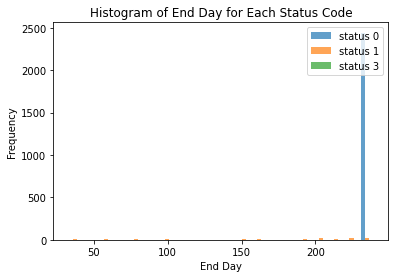

In [33]:
import matplotlib.pyplot as plt

# Histogram of the 'end_day' column for each status_code
plt.hist([edf0['end_day'], edf1['end_day'], edf3['end_day']], 
         label=['status 0', 'status 1', 'status 3'], 
         bins=20, 
         alpha=0.7)

plt.xlabel('End Day')
plt.ylabel('Frequency')
plt.title('Histogram of End Day for Each Status Code')
plt.legend(loc='upper right')
plt.show()


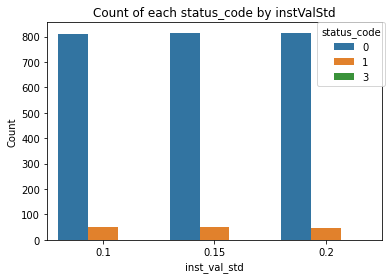

In [34]:
#inst_val_std
# Create a countplot
sns.countplot(x='inst_val_std', hue='status_code', data=edf)

# Place the legend outside of the plot
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, title='status_code')

plt.xlabel('inst_val_std')
plt.ylabel('Count')
plt.title('Count of each status_code by instValStd')
plt.show()

In [ ]:
#attention_values
# Create a countplot
sns.countplot(x='attention', hue='status_code', data=edf)

# Place the legend outside of the plot
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, title='status_code')

plt.xlabel('attention_value')
plt.ylabel('Count')
plt.title('Count of each status_code by attention_values')
plt.show()

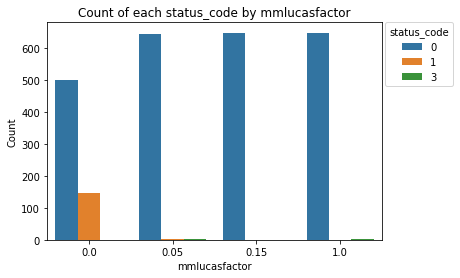

In [35]:
#mmlucasfactor
# Create a countplot
sns.countplot(x='mmlucasfactor', hue='status_code', data=edf)

# Place the legend outside of the plot
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, title='status_code')

plt.xlabel('mmlucasfactor')
plt.ylabel('Count')
plt.title('Count of each status_code by mmlucasfactor')
plt.show()

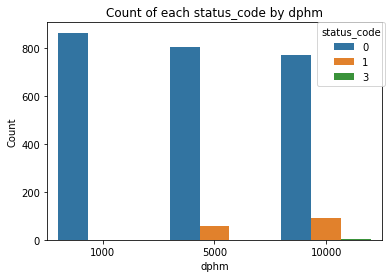

In [36]:
#dphms = [1000, 5000, 10000]
# Create a countplot
sns.countplot(x='dphm', hue='status_code', data=edf)

# Place the legend outside of the plot
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, title='status_code')

plt.xlabel('dphm')
plt.ylabel('Count')
plt.title('Count of each status_code by dphm')
plt.show()


In [ ]:
#zetas = [0, 0.3, .7, 1.0]
# Create a countplot
sns.countplot(x='zeta', hue='status_code', data=edf)

# Place the legend outside of the plot
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, title='status_code')

plt.xlabel('zeta')
plt.ylabel('Count')
plt.title('Count of each status_code by zeta')
plt.show()

In [ ]:
#pop_aNrmInitMeans =  [5, 6, 7]
sns.countplot(x='pop_aNrmInitMean', hue='status_code', data=edf)

# Place the legend outside of the plot
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, title='status_code')

plt.xlabel('pop_aNrmInitMean')
plt.ylabel('Count')
plt.title('Count of each status_code by pop_aNrmInitMean')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Filter DataFrame for status_code 1
edf1 = edf[edf['status_code'] == 1]

# Create a histogram for end_day
plt.hist(edf1['end_day'], bins=20, alpha=0.7)
plt.xlabel('End Day')
plt.ylabel('Frequency')
plt.title('Histogram of End Day for status_code 1')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Filter DataFrame for status_code 1
edf0 = edf[edf['status_code'] == 0]

# Create a histogram for end_day
plt.hist(edf0['dphm'], bins=20, alpha=0.7)
plt.xlabel('Dollars per Hark')
plt.ylabel('Frequency')
plt.title('Histogram of dphm for status_code 0')
plt.show()


In [ ]:
# Get a count of records for each unique 'dphm' value
dphm_counts = edf0['dphm'].value_counts()
print(dphm_counts)


In [ ]:
# Get a count of records for each unique 'pop_aNrmInitMean' value
pop_aNrmInitMean_counts = edf0['pop_aNrmInitMean'].value_counts()
print(pop_aNrmInitMean_counts)


In [ ]:
# Get a count of records for each unique 'zeta' value
zeta_counts = edf0['zeta'].value_counts()
print(zeta_counts)


In [ ]:
# Get a count of records for each unique 'mmlucasfactor' value
mmlucasfactor_counts = edf0['mmlucasfactor'].value_counts()
print(mmlucasfactor_counts)

In [ ]:
# Get a count of records for each unique 'attention' value
attention_counts = edf0['attention'].value_counts()
print(attention_counts)

In [ ]:
# Get a count of records for each unique 'inst_val_std' value
inst_val_std_counts = edf0['inst_val_std'].value_counts()
print(inst_val_std_counts)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot for 'dphm' and 'zeta', color by 'status_code'
sns.scatterplot(x='dphm', y='zeta', hue='status_code', data=edf1)

plt.title('Scatter plot of dphm and zeta colored by status_code')
plt.show()


In [ ]:
import seaborn as sns

# Filter DataFrame for status_code 1
edf1 = edf[edf['status_code'] == 1]

# Create a pairplot of the DataFrame
#sns.pairplot(edf1)
sns.pairplot(edf1[['inst_val_std', 'dphm', 'mmlucasfactor','attention','zeta','pop_aNrmInitMean']])
plt.show()


plt.show()


In [ ]:
# Calculate the correlation matrix
edfparams = edf[['inst_val_std','end_day','dphm','mmlucasfactor','attention','zeta','pop_aNrmInitMean']]
corr = edfparams.corr()

# Plot the correlation heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

In [ ]:
edf0

In [ ]:
# Calculate correlation with 'end_day'
correlation = edf0.corr()['attention'].sort_values()
print(correlation)


In [ ]:
import matplotlib.pyplot as plt

# Create scatter plots of 'end_day' versus the other variables
for col in edfparams.columns.drop('end_day'):
    plt.scatter(edf[col], edf['end_day'])
    plt.xlabel(col)
    plt.ylabel('end_day')
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Create scatter plots of 'attention' versus the other variables
for col in edfparams.columns.drop('attention'):
    plt.scatter(edf[col], edf['attention'])
    plt.xlabel(col)
    plt.ylabel('attention')
    plt.show()


In [ ]:
edfparams = edf[['inst_val_std','end_day','dphm','mmlucasfactor','attention','zeta','pop_aNrmInitMean']]

plt.scatter(edf['end_day'], edf['attention'])
plt.xlabel('end_day')
plt.ylabel('attention')
plt.show()


plt.scatter(edf['end_day'], edf['dphm'])
plt.xlabel('end_day')
plt.ylabel('dphm')
plt.show()


plt.scatter(edf['end_day'], edf['zeta'])
plt.xlabel('end_day')
plt.ylabel('zeta')
plt.show()

plt.scatter(edf['end_day'], edf['mmlucasfactor'])
plt.xlabel('end_day')
plt.ylabel('mmlucasfactor')
plt.show()

plt.scatter(edf['end_day'], edf['inst_val_std'])
plt.xlabel('end_day')
plt.ylabel('inst_val_std')
plt.show()


In [ ]:
edf.loc[2000]['mmlucasfactor']

In [ ]:
# Filter DataFrame where 'mmlucasfactor' is 0
# Calculate sum of 'end_day' where 'mmlucasfactor' is 0
#filsum_end_day = filtered_df['end_day'].sum()
#sum_end_day = edf['end_day'].sum()
# Print the result
#print(f"The sum of 'end_day' when 'mmlucasfactor' is 0 is {filsum_end_day}.")
#print(f"The sum of 'end_day' is {sum_end_day}.")


In [ ]:
# Split DataFrame based on 'dphm' value
dphm_1000 = edf[edf['dphm'] == 1000]
dphm_5000 = edf[edf['dphm'] == 5000]
dphm_10000 = edf[edf['dphm'] == 10000]

# Split DataFrame based on 'pop_aNrmInitMean' value
pop_5 = edf[edf['pop_aNrmInitMean'] == 5]
pop_6 = edf[edf['pop_aNrmInitMean'] == 6]
pop_7 = edf[edf['pop_aNrmInitMean'] == 7]

# Split DataFrame based on 'zeta' value
zeta_00 = edf[edf['zeta'] == 0.0]
zeta_03 = edf[edf['zeta'] == 0.3]
zeta_07 = edf[edf['zeta'] == 0.7]
zeta_10 = edf[edf['zeta'] == 1.0]

# Split DataFrame based on 'mmlucasfactor' value
lucfactor_00 = edf[edf['mmlucasfactor'] == 0.0]
lucfactor_05 = edf[edf['mmlucasfactor'] == 0.05]
lucfactor_15 = edf[edf['mmlucasfactor'] == 0.15]
lucfactor_10 = edf[edf['mmlucasfactor'] == 1.00]

# Split DataFrame based on 'attention' value
attention_005 = edf[edf['attention'] == 0.005]
attention_015 = edf[edf['attention'] == 0.15]
attention_050 = edf[edf['attention'] == 0.50]


# Split DataFrame based on 'inst_val_std' value
inst_val_std_010 = edf[edf['inst_val_std'] == 0.1]
inst_val_std_015 = edf[edf['inst_val_std'] == 0.15]
inst_val_std_020 = edf[edf['inst_val_std'] == 0.2]


In [ ]:

# Calculate simulation Days  based on 'dphm' value 
dphm_1000['end_day'].sum()
dphm_5000['end_day'].sum()
dphm_10000['end_day'].sum()

# Calculate simulation Days  based on 'pop_aNrmInitMean' value
pop_5['end_day'].sum()
pop_6['end_day'].sum()
pop_7['end_day'].sum()


# Calculate simulation Days  based on 'zeta' value
zeta_00['end_day'].sum()
zeta_03['end_day'].sum()
zeta_07['end_day'].sum()
zeta_10['end_day'].sum()

# Calculate simulation Days  based on 'mmlucasfactor' value
lucfactor_00['end_day'].sum()
lucfactor_05['end_day'].sum()
lucfactor_15['end_day'].sum()
lucfactor_10['end_day'].sum()

# Calculate simulation Days  based on 'attention' value
attention_005['end_day'].sum()
attention_015['end_day'].sum()
attention_050['end_day'].sum()


# Calculate simulation Days based on 'inst_val_std' value
inst_val_std_010['end_day'].sum()
inst_val_std_015['end_day'].sum()
inst_val_std_020['end_day'].sum()

In [ ]:
# Get unique values
dphm_values = edf['dphm'].unique()
inst_val_std_values = edf['inst_val_std'].unique()
attention_values = edf['attention'].unique()
zeta_values = edf['zeta'].unique()
pop_values = edf['pop_aNrmInitMean'].unique()
mmlucasfactor_values = edf['mmlucasfactor'].unique()

In [30]:
dphm_1000 = edf[edf['dphm'] == 1000]
dphm_5000 = edf[edf['dphm'] == 5000]
dphm_10000 = edf[edf['dphm'] == 10000]
totaldays = 0
for value in dphm_values:
    items = edf[edf['dphm'] == value]
    days = items['end_day'].sum()
    totaldays = days
    print(f'{totaldays} days simulated when dphm is {value} or {(totaldays/potentialDays*100)}%\n')


NameError: name 'dphm_values' is not defined

In [ ]:
totaldays = 0
for value in zeta_values:
    items = edf[edf['zeta'] == value]
    days = items['end_day'].sum()
    totaldays = days
    print(f'{totaldays} days simulated when zeta is {value} or {(totaldays/potentialDays*100)}%\n')


In [ ]:
totaldays = 0
for value in mmlucasfactor_values:
    items = edf[edf['mmlucasfactor'] == value]
    days = items['end_day'].sum()
    totaldays = days
    print(f'{totaldays} days simulated when mmlucasfactor is {value} or {(totaldays/potentialDays*100)}%\n')


In [ ]:
totaldays = 0
for value in attention_values:
    items = edf[edf['attention'] == value]
    days = items['end_day'].sum()
    totaldays = days
    print(f'{totaldays} days simulated when attention is {value} or {(totaldays/potentialDays*100)}%\n')


In [ ]:
totaldays = 0
for value in inst_val_std_values:
    items = edf[edf['inst_val_std'] == value]
    days = items['end_day'].sum()
    totaldays = days
    print(f'{totaldays} days simulated when inst_val_std is {value} or {(totaldays/potentialDays*100)}%\n')


In [ ]:
totaldays = 0
for value in pop_values:
    items = edf[edf['pop_aNrmInitMean'] == value]
    days = items['end_day'].sum()
    totaldays = days
    print(f'{totaldays} days simulated when pop_aNrmInitMean is {value} or {(totaldays/potentialDays*100)}%\n')


In [29]:
totaldays = 0
for value in dphm_values:
    items = edf[edf['dphm'] == value]
    days = items['end_day'].sum()
    totaldays = days
    percentage = format((totaldays/potentialDays*100), ".2f")
    print(f'{totaldays} days simulated when dphm is {value} or {percentage}%\n')

totaldays = 0
for value in zeta_values:
    items = edf[edf['zeta'] == value]
    days = items['end_day'].sum()
    totaldays = days
    percentage = format((totaldays/potentialDays*100), ".2f")
    print(f'{totaldays} days simulated when zeta is {value} or {percentage}%\n')

totaldays = 0
for value in mmlucasfactor_values:
    items = edf[edf['mmlucasfactor'] == value]
    days = items['end_day'].sum()
    totaldays = days
    percentage = format((totaldays/potentialDays*100), ".2f")
    print(f'{totaldays} days simulated when mmlucasfactor is {value} or {percentage}%\n')

totaldays = 0
for value in attention_values:
    items = edf[edf['attention'] == value]
    days = items['end_day'].sum()
    totaldays = days
    percentage = format((totaldays/potentialDays*100), ".2f")
    print(f'{totaldays} days simulated when attention is {value} or {percentage}%\n')

totaldays = 0
for value in inst_val_std_values:
    items = edf[edf['inst_val_std'] == value]
    days = items['end_day'].sum()
    totaldays = days
    percentage = format((totaldays/potentialDays*100), ".2f")
    print(f'{totaldays} days simulated when inst_val_std is {value} or  {percentage}%\n')
    
totaldays = 0
for value in pop_values:
    items = edf[edf['pop_aNrmInitMean'] == value]
    days = items['end_day'].sum()
    totaldays = days
    percentage = format((totaldays/potentialDays*100), ".2f")
    print(f'{totaldays} days simulated when pop_aNrmInitMean is {value} or {percentage}%\n')


NameError: name 'dphm_values' is not defined

In [31]:
totaldays = 0
for value in dphm_values:
    ditems = edf[edf['dphm'] == value]
    ddays = ditems['end_day'].sum()
    totaldays = ddays
    dpercentage = format((totaldays/potentialDays*100), ".2f")
    print(f'{totaldays} days simulated when dphm is {value} or {dpercentage}%\n')

totaldays = 0
for value in zeta_values:
    zitems = edf[edf['zeta'] == value]
    zdays = zitems['end_day'].sum()
    totaldays = zdays
    zpercentage = format((totaldays/potentialDays*100), ".2f")
    print(f'{totaldays} days simulated when zeta is {value} or {zpercentage}%\n')

totaldays = 0
for value in mmlucasfactor_values:
    mitems = edf[edf['mmlucasfactor'] == value]
    mdays = mitems['end_day'].sum()
    totaldays = mdays
    mpercentage = format((totaldays/potentialDays*100), ".2f")
    print(f'{totaldays} days simulated when mmlucasfactor is {value} or {mpercentage}%\n')

totaldays = 0
for value in attention_values:
    aitems = edf[edf['attention'] == value]
    adays = aitems['end_day'].sum()
    totaldays = adays
    apercentage = format((totaldays/potentialDays*100), ".2f")
    print(f'{totaldays} days simulated when attention is {value} or {apercentage}%\n')

totaldays = 0
for value in inst_val_std_values:
    iitems = edf[edf['inst_val_std'] == value]
    idays = iitems['end_day'].sum()
    totaldays = idays
    ipercentage = format((totaldays/potentialDays*100), ".2f")
    print(f'{totaldays} days simulated when inst_val_std is {value} or  {ipercentage}%\n')
    
totaldays = 0
for value in pop_values:
    pitems = edf[edf['pop_aNrmInitMean'] == value]
    pdays = pitems['end_day'].sum()
    totaldays = days
    ppercentage = format((totaldays/potentialDays*100), ".2f")
    print(f'{totaldays} days simulated when pop_aNrmInitMean is {value} or {ppercentage}%\n')


NameError: name 'dphm_values' is not defined

In [ ]:
print(potentialDays)
s0days = len(edf0)*240
print(s0days)
s0percentage = format((s0days/potentialDays*100), ".2f")
print(s0percentage)

In [32]:

totaldays = 0
for value in dphm_values:
    ditems = edf0[edf0['dphm'] == value]
    ddays = ditems['end_day'].sum()
    totaldays = ddays
    dpercentage = format((totaldays/potentialDays*100), ".2f")
    print(f'{totaldays} days simulated when dphm is {value} or {dpercentage}%\n')

totaldays = 0
for value in zeta_values:
    zitems = edf0[edf0['zeta'] == value]
    zdays = zitems['end_day'].sum()
    totaldays = zdays
    zpercentage = format((totaldays/potentialDays*100), ".2f")
    print(f'{totaldays} days simulated when zeta is {value} or {zpercentage}%\n')

totaldays = 0
for value in mmlucasfactor_values:
    mitems = edf0[edf0['mmlucasfactor'] == value]
    mdays = mitems['end_day'].sum()
    totaldays = mdays
    mpercentage = format((totaldays/potentialDays*100), ".2f")
    print(f'{totaldays} days simulated when mmlucasfactor is {value} or {mpercentage}%\n')

totaldays = 0
for value in attention_values:
    aitems = edf0[edf0['attention'] == value]
    adays = aitems['end_day'].sum()
    totaldays = adays
    apercentage = format((totaldays/potentialDays*100), ".2f")
    print(f'{totaldays} days simulated when attention is {value} or {apercentage}%\n')

totaldays = 0
for value in inst_val_std_values:
    iitems = edf0[edf0['inst_val_std'] == value]
    idays = iitems['end_day'].sum()
    totaldays = idays
    ipercentage = format((totaldays/potentialDays*100), ".2f")
    print(f'{totaldays} days simulated when inst_val_std is {value} or  {ipercentage}%\n')
    
totaldays = 0
for value in pop_values:
    pitems = edf0[edf0['pop_aNrmInitMean'] == value]
    pdays = pitems['end_day'].sum()
    totaldays = days
    ppercentage = format((totaldays/potentialDays*100), ".2f")
    print(f'{totaldays} days simulated when pop_aNrmInitMean is {value} or {ppercentage}%\n')


NameError: name 'dphm_values' is not defined

In [ ]:
edf0 = edf[edf['status_code'] == 0]
# Filter DataFrame where 'mmlucasfactor' is 0 and 'status_code' is 1
lucass0_df = edf[(edf['mmlucasfactor'] == 0.05) & (edf['status_code'] == 0)]
lucass0_df

In [ ]:
len(redf)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
redf = edf.fillna(0)
X = redf[['inst_val_std', 'dphm', 'mmlucasfactor','attention','zeta','pop_aNrmInitMean']]  # the input variables
y = redf['ror_volatility']  # the output variable

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Use the model to predict the test set
y_pred = model.predict(X_test)

# Print the coefficients, mean squared error, and the variance score.
print('Coefficients: \n', model.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


In [ ]:
residuals = y_test - y_pred

# plot residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0, color='red')
plt.title('Residual vs. Predicted')
plt.show()

# histogram of the residuals
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.show()
